# Basic Example

In [1]:
import isolines as il
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## 1. walking isochrones from a point address

In this basic example, isochrones with 2.5 minutes walk intervals minutes from Prospect Park, Brooklyn, NYC are calculated.
<ul>
    <li>
The metric is set to 'time' (default is 'distance') - this will produce time-equal isochrones
</li>
<li>
The units are set to feet (default is meters)
</li>
<li>
The address type is set to point (the default is 'all', allowing polygon and segment source locations)
</li>
    <li>
The walking speed default is  84 m per minute or 276 ft per minute (~5 km per hour, 4.6 ft per second), here we set it to 300 ft per minute
</li>
</ul>


In [15]:
isochrones = il.OsmIsolines('Prospect Park, Brooklyn, NYC, USA',
                                 network_type = 'walk',
                                 metric = 'time',
                                 values=np.arange(2.5, 10, 2.5),
                                 unit='ft',
                                 address_type='all',
                                 speed = 300,
                            
                                 )

Finished downloading graph from OSM using osmnx, time elapsed: 12.037488460540771 seconds.


### 1.1 get the isolines geopandas GeoDataFrame 

In [3]:
df = isochrones.get_isolines()
df.head()

,geometry,time
0,POLYGON ((-73.97159995838106 40.64949073374155...,2.5
1,POLYGON ((-73.97101567533382 40.64748031051116...,5.0
2,POLYGON ((-73.97059818977174 40.64549373274374...,7.5


### 1.2 or the projected isolines (UTM)

In [4]:
df = isochrones.get_projected_isolines()
df.head()

,geometry,time
0,"POLYGON ((586947.2916793466 4500356.739317483,...",2.5
1,"POLYGON ((586999.3024927872 4500134.149218048,...",5.0
2,"POLYGON ((587037.1820158608 4499914.041405223,...",7.5


### 1.3 print the original data crs and the utm crs

In [5]:
print(isochrones.crs,  isochrones.utm)

4326 32618


### 1.4 plot the isochrones

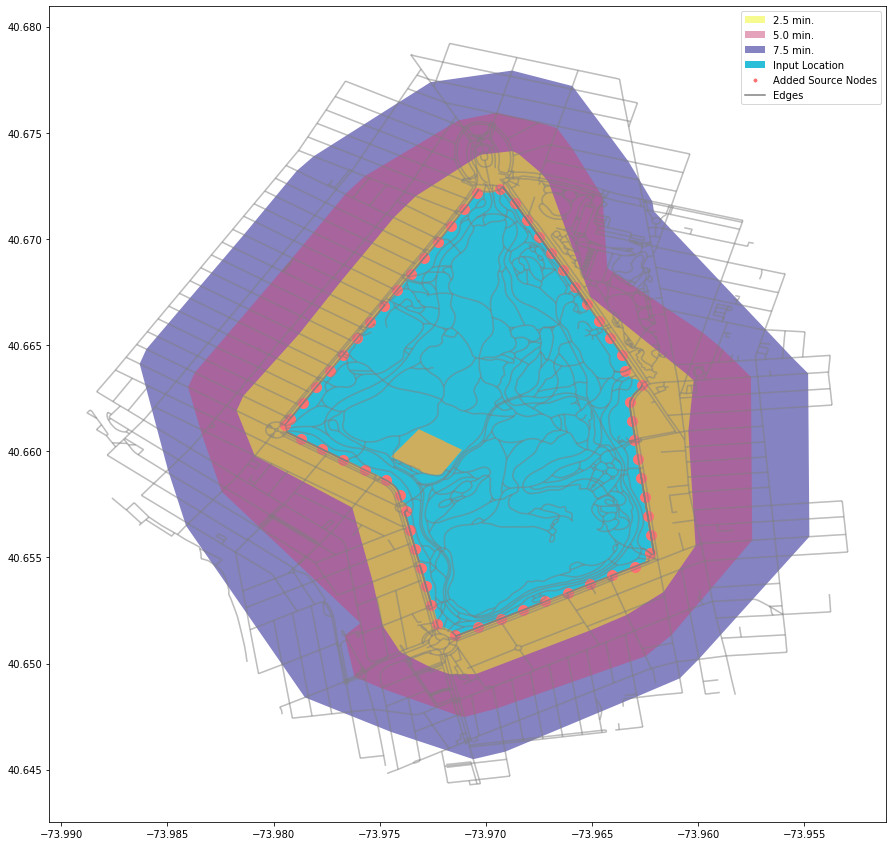

In [6]:
isochrones.plot_isolines()

### 1.5  get the graph as a NetworkX multigraph

In [8]:
G = isochrones.get_graph()
list(G.edges(data = True))[0:5]

[(42479617,
  42508239,
  {'weight': 132.21166194642416,
   'geometry': <shapely.geometry.linestring.LineString at 0x7f261de29da0>,
   'osmid': 5679252,
   'oneway': False}),
 (42479617,
  42479613,
  {'weight': 79.32538029697628,
   'geometry': <shapely.geometry.linestring.LineString at 0x7f261de29d68>,
   'osmid': 276055774,
   'oneway': False}),
 (42508239,
  42479617,
  {'weight': 132.21166194642416,
   'geometry': <shapely.geometry.linestring.LineString at 0x7f261de29d30>,
   'osmid': 5679252,
   'oneway': False}),
 (42508239,
  42488890,
  {'weight': 80.37972935317767,
   'geometry': <shapely.geometry.linestring.LineString at 0x7f261de29cf8>,
   'osmid': 5681792,
   'oneway': False}),
 (42508239,
  42526054,
  {'weight': 110.09387509697277,
   'geometry': <shapely.geometry.linestring.LineString at 0x7f261de29cc0>,
   'osmid': 5681792,
   'oneway': False})]

### 1.6 get the nodes and edges as geopandas GeoDataFrames  
(use get_projected_edges, or get_projected_nodes to get the nodes and edges GeoDataFrames in UTM coordinate system)

In [9]:
nodes = isochrones.get_nodes()
edges = isochrones.get_edges()

In [10]:
edges.head()

,source,target,osmid,weight,oneway,geometry
0,42479617,42508239,5679252,132.211662,False,"LINESTRING (-73.954975 40.665621, -73.955085 4..."
1,42479617,42479613,276055774,79.325380,False,"LINESTRING (-73.954975 40.665621, -73.955911 4..."
2,42508239,42479617,5679252,132.211662,False,"LINESTRING (-73.955085 40.664433, -73.954975 4..."
3,42508239,42488890,5681792,80.379729,False,"LINESTRING (-73.955085 40.664433, -73.95603300..."
4,42508239,42526054,5681792,110.093875,False,"LINESTRING (-73.955085 40.664433, -73.95378700..."


In [11]:
nodes.head()

,osmid,lon,lat,geometry
0,42479617,-73.954975,40.665621,POINT (-73.954975 40.665621)
1,42508239,-73.955085,40.664433,POINT (-73.955085 40.664433)
2,42479613,-73.955911,40.665672,POINT (-73.955911 40.665672)
3,6579343365,-73.970151,40.660494,POINT (-73.97015089999999 40.66049439999999)
4,2645350416,-73.970059,40.660460,POINT (-73.9700586 40.6604603)
